In [1]:
from zipfile import ZipFile
from utils.download_sample import download_from_dropbox
from utils.coordinate_utils import extract_coordinates, normalize_coords_to_pixel
from utils.imutils import *
from utils.shapely_and_napari_utils import *
from pathlib import Path
import napari
from napari.utils import nbscreenshot
import time
from shapely.geometry import GeometryCollection
from shapely.geometry import Point

In [2]:
%gui qt

In [3]:
time.sleep(1)

In [4]:
if not Path("Stiching_Example_Dataset").exists():
    # Download and extract sample data
    example_dataset="https://www.dropbox.com/s/rhggl54sbpx9llj/Stiching_Example_Dataset.zip?dl=0"
    print("Downloading sample file from dropbox")
    download_from_dropbox(example_dataset, "_sample.zip")
    print("Extracting sample file")
    ZipFile("_sample.zip").extractall()

In [5]:
coords = extract_coordinates("Stiching_Example_Dataset/out.txt")
coords

,name,X,Y,Z,um/px
0,1_0000,3582.7,4164.4,1686.65,0.64
1,1_0001,-12396.6,11719.3,1686.63,0.64
2,1_0002,-13583.0,11726.0,1686.63,0.64
3,1_0003,-14769.3,11732.8,1686.63,0.64
4,1_0004,-15955.6,11739.5,1686.63,0.64
...,...,...,...,...,...
67,1_0067,-16003.1,3370.3,1686.63,0.64
68,1_0068,-14816.8,3363.5,1686.63,0.64
69,1_0069,-13630.5,3356.8,1686.63,0.64
70,1_0070,-12444.2,3350.1,1686.63,0.64


In [6]:
files = sorted(list(Path("Stiching_Example_Dataset").glob("*.jpg")))
files

[PosixPath('Stiching_Example_Dataset/Well1_Seq0001_1_0000.jpg'),
 PosixPath('Stiching_Example_Dataset/Well1_Seq0001_1_0001.jpg'),
 PosixPath('Stiching_Example_Dataset/Well1_Seq0001_1_0002.jpg'),
 PosixPath('Stiching_Example_Dataset/Well1_Seq0001_1_0003.jpg'),
 PosixPath('Stiching_Example_Dataset/Well1_Seq0001_1_0004.jpg'),
 PosixPath('Stiching_Example_Dataset/Well1_Seq0001_1_0005.jpg'),
 PosixPath('Stiching_Example_Dataset/Well1_Seq0001_1_0006.jpg'),
 PosixPath('Stiching_Example_Dataset/Well1_Seq0001_1_0007.jpg'),
 PosixPath('Stiching_Example_Dataset/Well1_Seq0001_1_0008.jpg'),
 PosixPath('Stiching_Example_Dataset/Well1_Seq0001_1_0009.jpg'),
 PosixPath('Stiching_Example_Dataset/Well1_Seq0001_1_0010.jpg'),
 PosixPath('Stiching_Example_Dataset/Well1_Seq0001_1_0011.jpg'),
 PosixPath('Stiching_Example_Dataset/Well1_Seq0001_1_0012.jpg'),
 PosixPath('Stiching_Example_Dataset/Well1_Seq0001_1_0013.jpg'),
 PosixPath('Stiching_Example_Dataset/Well1_Seq0001_1_0014.jpg'),
 PosixPath('Stiching_Exam

In [7]:
normalized_coords=normalize_coords_to_pixel(coords).to_numpy()

In [8]:
v = napari.Viewer()

2021-06-23 11:53:19,229 [INFO] WRITING LOG OUTPUT TO /home/hilsenst/.cellpose/run.log


In [9]:
# skip first image as it is an outlier (stage position wise)
mosaic_layers = []
for file, coord in zip(files[1:], normalized_coords[1:]):
    im = load_image(file)
    im = transpose(select_channel(crop_black_border(im),0))
    layer = v.add_image(im, translate=coord, name=file.stem)
    mosaic_layers.append(layer)

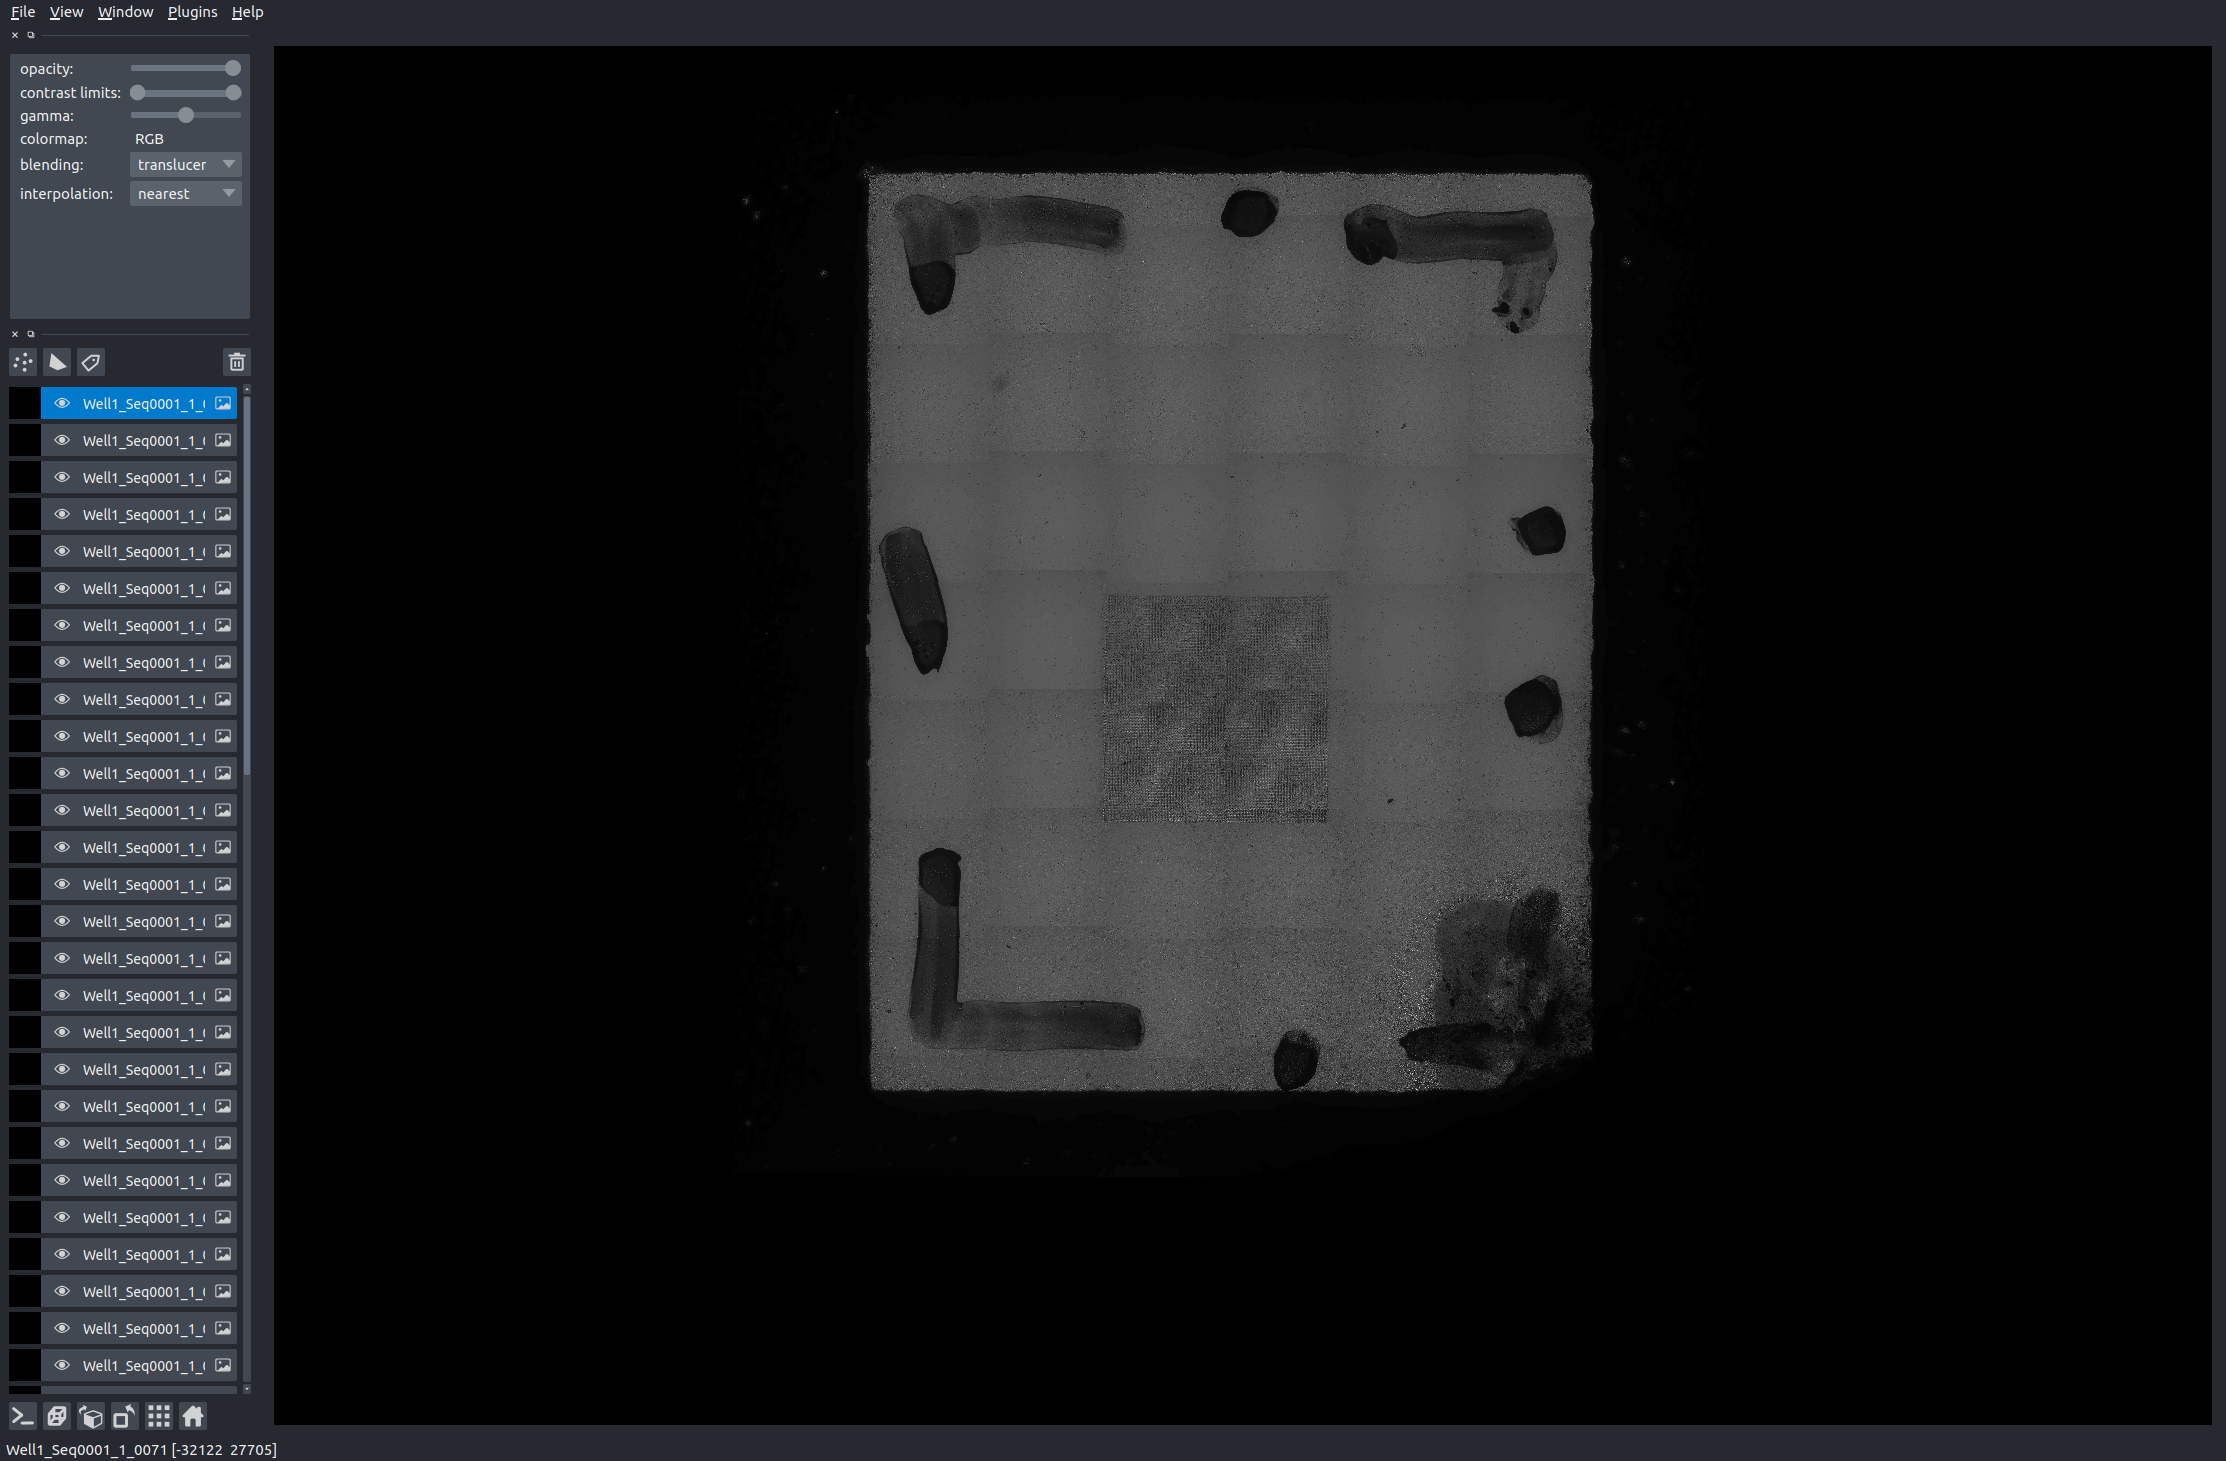

In [10]:
nbscreenshot(v)

In [10]:
for layer in mosaic_layers:
    print(layer.affine.affine_matrix)

[[ 1.00000000e+00  0.00000000e+00 -1.93696875e+04]
 [ 0.00000000e+00  1.00000000e+00  1.83114062e+04]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
[[ 1.00000000e+00  0.00000000e+00 -2.12234375e+04]
 [ 0.00000000e+00  1.00000000e+00  1.83218750e+04]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
[[ 1.00000000e+00  0.00000000e+00 -2.30770312e+04]
 [ 0.00000000e+00  1.00000000e+00  1.83325000e+04]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
[[ 1.00000000e+00  0.00000000e+00 -2.49306250e+04]
 [ 0.00000000e+00  1.00000000e+00  1.83429688e+04]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
[[ 1.00000000e+00  0.00000000e+00 -2.67842188e+04]
 [ 0.00000000e+00  1.00000000e+00  1.83535938e+04]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
[[ 1.00000000e+00  0.00000000e+00 -2.86378125e+04]
 [ 0.00000000e+00  1.00000000e+00  1.83640625e+04]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
[[ 1.00000000e+00  0.00000000e+00 -3.04914062e+04]
 [ 0.00000000e+00  1.0000

In [11]:
for layer in mosaic_layers:
    print(layer.data.shape)
    print(get_image_layer_rect(layer))

(2044, 2048, 1)
[[-19369.6875   18311.40625]
 [-17325.6875   18311.40625]
 [-17325.6875   20359.40625]
 [-19369.6875   20359.40625]]
(2044, 2048, 1)
[[-21223.4375  18321.875 ]
 [-19179.4375  18321.875 ]
 [-19179.4375  20369.875 ]
 [-21223.4375  20369.875 ]]
(2044, 2048, 1)
[[-23077.03125  18332.5    ]
 [-21033.03125  18332.5    ]
 [-21033.03125  20380.5    ]
 [-23077.03125  20380.5    ]]
(2044, 2048, 1)
[[-24930.625    18342.96875]
 [-22886.625    18342.96875]
 [-22886.625    20390.96875]
 [-24930.625    20390.96875]]
(2044, 2048, 1)
[[-26784.21875  18353.59375]
 [-24740.21875  18353.59375]
 [-24740.21875  20401.59375]
 [-26784.21875  20401.59375]]
(2044, 2048, 1)
[[-28637.8125  18364.0625]
 [-26593.8125  18364.0625]
 [-26593.8125  20412.0625]
 [-28637.8125  20412.0625]]
(2044, 2048, 1)
[[-30491.40625  18374.53125]
 [-28447.40625  18374.53125]
 [-28447.40625  20422.53125]
 [-30491.40625  20422.53125]]
(2044, 2048, 1)
[[-32345.15625  18385.15625]
 [-30301.15625  18385.15625]
 [-30301.15

### Find oriented bounding boxes:

In [12]:
# find min/max x,y coordinates across all bounding boxes
oriented_bboxes=[]
for layer in mosaic_layers:
    oriented_bboxes.append(get_image_layer_rect(layer))

In [13]:
s=v.add_shapes(oriented_bboxes, name="bboxes of mosaic layers")

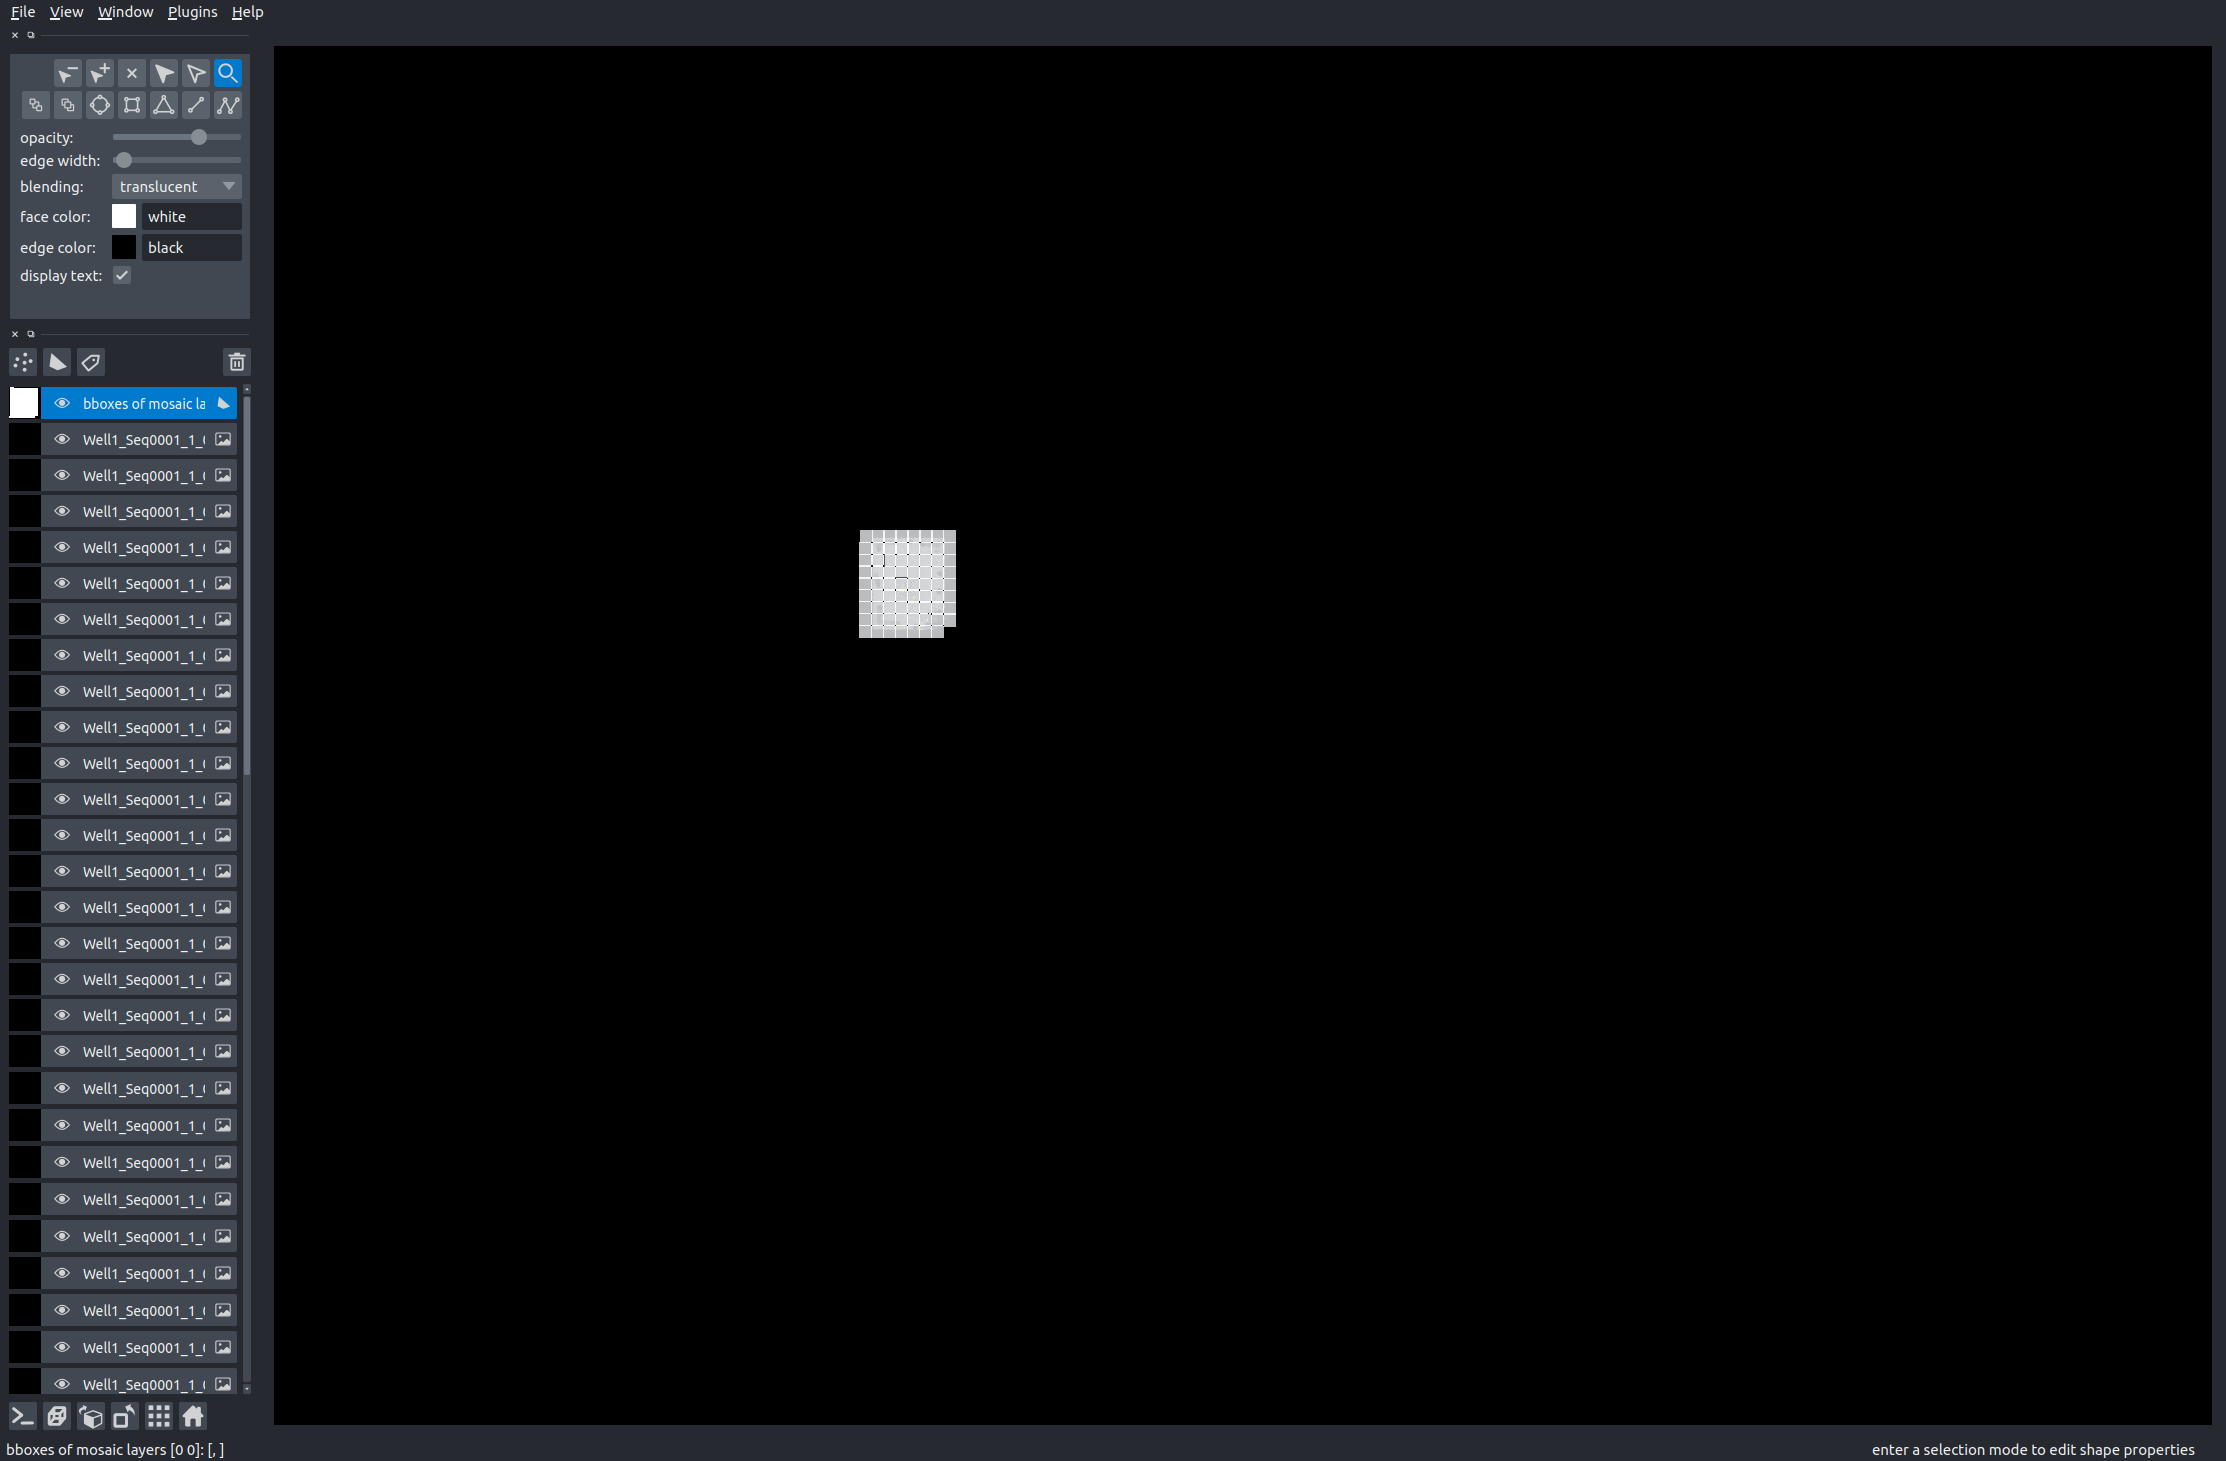

In [14]:
nbscreenshot(v)

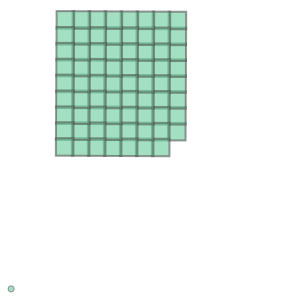

In [15]:
mosaic = napari_shape_layer_to_shapely(s)
origin = Point(0,0)
GeometryCollection((origin, mosaic))

In [16]:
all_bboxes = np.vstack(oriented_bboxes)

In [17]:
# minimum extents
all_min = all_bboxes.min(axis=0)
all_min

array([-32419.375  ,   5223.90625])

In [18]:
# maximum extents
all_max = all_bboxes.max(axis=0)
all_max

array([-15482.71875,  20433.15625])

In [19]:
# total extents shape
all_max - all_min

array([16936.65625, 15209.25   ])

In [20]:
stitched_shape=np.ceil(all_max-all_min).astype(np.int)
stitched_shape

array([16937, 15210])

In [21]:
# translate all mosaic layers such that they are at the origin

In [22]:
from skimage.transform import AffineTransform

In [23]:
shift_to_origin = AffineTransform(translation=-all_min)
shift_to_origin.params

array([[ 1.00000000e+00, -0.00000000e+00,  3.24193750e+04],
       [ 0.00000000e+00,  1.00000000e+00, -5.22390625e+03],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])

In [24]:
# shift all layers of mosaic
for layer in mosaic_layers:
    layer.affine = layer.affine.affine_matrix @ shift_to_origin

In [25]:
# find min/max x,y coordinates across all bounding boxes
oriented_bboxes=[]
for layer in mosaic_layers:
    oriented_bboxes.append(get_image_layer_rect(layer))

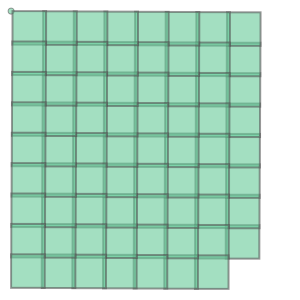

In [26]:
# find min/max x,y coordinates across all bounding boxes
oriented_bboxes=[]
for layer in mosaic_layers:
    oriented_bboxes.append(get_image_layer_rect(layer))
s_shifted = v.add_shapes(oriented_bboxes, name="bboxes after shift")
mosaic_shifted = napari_shape_layer_to_shapely(s_shifted)
origin = Point(0,0)
GeometryCollection((origin, mosaic_shifted))

In [27]:
import dask.array as da

In [28]:
target_array = da.zeros(stitched_shape, dtype=np.uint16, chunks=(4000, 4000))

In [29]:
target_array.chunks

((4000, 4000, 4000, 4000, 937), (4000, 4000, 4000, 3210))

In [30]:
tuple(map(sum, target_array.chunks))

(16937, 15210)

In [31]:
def chunk_slices(arr: da.core.Array):
    """ given a dask array return coordinates
    representing slice indices for the individual chunks.
    
    There is probably a more elegant way to do this."""
    chunksy, chunksx = target_array.chunks
    y=0
    for cy in chunksy:
        x =0 
        for cx in chunksx:
            yield((y,y+cy), (x,x+cx))
            x = x + cx
        y=y + cy

In [32]:
list(chunk_slices(target_array))

[((0, 4000), (0, 4000)),
 ((0, 4000), (4000, 8000)),
 ((0, 4000), (8000, 12000)),
 ((0, 4000), (12000, 15210)),
 ((4000, 8000), (0, 4000)),
 ((4000, 8000), (4000, 8000)),
 ((4000, 8000), (8000, 12000)),
 ((4000, 8000), (12000, 15210)),
 ((8000, 12000), (0, 4000)),
 ((8000, 12000), (4000, 8000)),
 ((8000, 12000), (8000, 12000)),
 ((8000, 12000), (12000, 15210)),
 ((12000, 16000), (0, 4000)),
 ((12000, 16000), (4000, 8000)),
 ((12000, 16000), (8000, 12000)),
 ((12000, 16000), (12000, 15210)),
 ((16000, 16937), (0, 4000)),
 ((16000, 16937), (4000, 8000)),
 ((16000, 16937), (8000, 12000)),
 ((16000, 16937), (12000, 15210))]

In [33]:
def chunk_slices_numpy(arr: da.core.Array):
    """ given a dask array return coordinates
    representing slice indices for the individual chunks.
    
    There is probably a more elegant way to do this."""
    chunksy, chunksx = target_array.chunks
    y=0
    for cy in chunksy:
        x =0 
        for cx in chunksx:
            yield np.s_[y:y+cy, x:x+cx]
            x = x + cx
        y=y + cy

In [34]:
list(chunk_slices_numpy(target_array))

[(slice(0, 4000, None), slice(0, 4000, None)),
 (slice(0, 4000, None), slice(4000, 8000, None)),
 (slice(0, 4000, None), slice(8000, 12000, None)),
 (slice(0, 4000, None), slice(12000, 15210, None)),
 (slice(4000, 8000, None), slice(0, 4000, None)),
 (slice(4000, 8000, None), slice(4000, 8000, None)),
 (slice(4000, 8000, None), slice(8000, 12000, None)),
 (slice(4000, 8000, None), slice(12000, 15210, None)),
 (slice(8000, 12000, None), slice(0, 4000, None)),
 (slice(8000, 12000, None), slice(4000, 8000, None)),
 (slice(8000, 12000, None), slice(8000, 12000, None)),
 (slice(8000, 12000, None), slice(12000, 15210, None)),
 (slice(12000, 16000, None), slice(0, 4000, None)),
 (slice(12000, 16000, None), slice(4000, 8000, None)),
 (slice(12000, 16000, None), slice(8000, 12000, None)),
 (slice(12000, 16000, None), slice(12000, 15210, None)),
 (slice(16000, 16937, None), slice(0, 4000, None)),
 (slice(16000, 16937, None), slice(4000, 8000, None)),
 (slice(16000, 16937, None), slice(8000, 1200

In [35]:
def get_rect_from_chunk_slice(chunk_slice):
    ylim, xlim = chunk_slice
    miny, maxy = ylim[0], ylim[1]-1
    minx, maxx = xlim[0], xlim[1]-1
    return np.array([[miny, minx],[maxy, minx], [maxy, maxx], [miny,maxx]])

In [36]:
chunk_shapes = list(map(get_rect_from_chunk_slice, chunk_slices(target_array)))

In [38]:
chunklayer = v.add_shapes(chunk_shapes, name="dask chunks", edge_color='red')

In [39]:
chunks_shapely = napari_shape_layer_to_shapely(chunklayer)

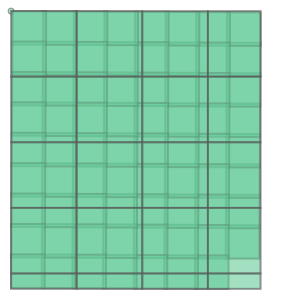

In [40]:
GeometryCollection([origin, mosaic_shifted, chunks_shapely])

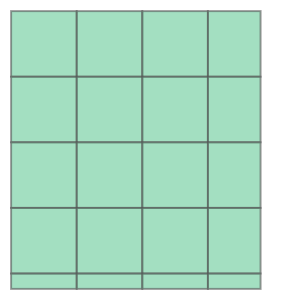

In [41]:
chunks_shapely

(0, 4000)
(0, 4000)
(0, 4000)
(0, 4000)
(4000, 8000)
(4000, 8000)
(4000, 8000)
(4000, 8000)
(8000, 12000)
(8000, 12000)
(8000, 12000)
(8000, 12000)
(12000, 16000)
(12000, 16000)
(12000, 16000)
(12000, 16000)
(16000, 16937)
(16000, 16937)
(16000, 16937)
(16000, 16937)


In [67]:
chunk_tiles = {}
tile_chunks = {}
for i, tile in enumerate(mosaic_shifted):
    print(f"Tile {i} intersects with:")
    for j, chunk in i(chunks_shapely):
        if tile.intersects(chunk):
            print(f"   chunk {j}")
            if i not in tile_chunks.keys():
                tile_chunks[i] = []
            tile_chunks[i].append(j)
            if j not in chunk_tiles.keys():
                chunk_tiles[j] = []
            chunk_tiles[j].append(i)
            print(f"intersection area {tile.intersection(chunk).area}")

Tile 0 intersects with:


TypeError: 'int' object is not callable

In [91]:
chunk_tiles = {}
tile_chunks = {}
for i, tile in enumerate(mosaic_shifted):
    print(f"Tile {i} intersects with:")
    for j, (chunk, chunk_slice) in enumerate(zip(chunks_shapely, list(chunk_slices(target_array)))):
        anchor_point = (chunk_slice[0][0], chunk_slice[1][0])
        if tile.intersects(chunk):
            print(f"   chunk {j}")
            if i not in tile_chunks.keys():
                tile_chunks[i] = []
            tile_chunks[i].append(j)
            if anchor_point not in chunk_tiles.keys():
                chunk_tiles[anchor_point] = []
            chunk_tiles[anchor_point].append((mosaic_layers[i].name, mosaic_layers[i].affine.affine_matrix))
            print(f"intersection area {tile.intersection(chunk).area}")

Tile 0 intersects with:
   chunk 15
intersection area 4186112.0
Tile 1 intersects with:
   chunk 11
intersection area 1644672.0
   chunk 15
intersection area 2539392.0
Tile 2 intersects with:
   chunk 11
intersection area 4186112.0
Tile 3 intersects with:
   chunk 7
intersection area 1044992.0
   chunk 11
intersection area 3139072.0
Tile 4 intersects with:
   chunk 7
intersection area 4186112.0
Tile 5 intersects with:
   chunk 3
intersection area 445312.0
   chunk 7
intersection area 3738752.0
Tile 6 intersects with:
   chunk 3
intersection area 4186112.0
Tile 7 intersects with:
   chunk 3
intersection area 4185601.0
Tile 8 intersects with:
   chunk 2
intersection area 1442808.5
   chunk 3
intersection area 2741259.5
Tile 9 intersects with:
   chunk 2
intersection area 1464526.0
   chunk 3
intersection area 2719542.0
Tile 10 intersects with:
   chunk 2
intersection area 165794.310546875
   chunk 3
intersection area 301049.626953125
   chunk 6
intersection area 1319402.845703125
   chun

In [92]:
chunk_tiles

{(12000,
  12000): [('Well1_Seq0001_1_0001',
   array([[1.00000000e+00, 0.00000000e+00, 1.30496875e+04],
          [0.00000000e+00, 1.00000000e+00, 1.30875000e+04],
          [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])), ('Well1_Seq0001_1_0002',
   array([[1.00000000e+00, 0.00000000e+00, 1.11959375e+04],
          [0.00000000e+00, 1.00000000e+00, 1.30979688e+04],
          [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])), ('Well1_Seq0001_1_0015',
   array([[1.00000000e+00, 0.00000000e+00, 1.11853125e+04],
          [0.00000000e+00, 1.00000000e+00, 1.12298438e+04],
          [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])), ('Well1_Seq0001_1_0016',
   array([[1.00000000e+00, 0.00000000e+00, 1.30390625e+04],
          [0.00000000e+00, 1.00000000e+00, 1.12193750e+04],
          [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])), ('Well1_Seq0001_1_0017',
   array([[1.00000000e+00, 0.00000000e+00, 1.48926562e+04],
          [0.00000000e+00, 1.00000000e+00, 1.12087500e+04],
   

In [44]:
tile_chunks

{0: [15],
 1: [11, 15],
 2: [11],
 3: [7, 11],
 4: [7],
 5: [3, 7],
 6: [3],
 7: [3],
 8: [2, 3],
 9: [2, 3],
 10: [2, 3, 6, 7],
 11: [6, 7],
 12: [6, 7, 10, 11],
 13: [10, 11],
 14: [10, 11, 14, 15],
 15: [14, 15],
 16: [14, 15, 18, 19],
 17: [14, 18],
 18: [14],
 19: [10, 14],
 20: [10],
 21: [6, 10],
 22: [6],
 23: [2, 6],
 24: [2],
 25: [2],
 26: [1, 2],
 27: [1, 2],
 28: [1, 2, 5, 6],
 29: [5, 6],
 30: [5, 6, 9, 10],
 31: [9, 10],
 32: [9, 10, 13, 14],
 33: [13, 14],
 34: [13, 14, 17, 18],
 35: [13, 17],
 36: [13],
 37: [9, 13],
 38: [9],
 39: [5, 9],
 40: [5],
 41: [1, 5],
 42: [1],
 43: [1],
 44: [0, 1],
 45: [0, 1],
 46: [0, 1, 4, 5],
 47: [4, 5],
 48: [4, 5, 8, 9],
 49: [8, 9],
 50: [8, 9, 12, 13],
 51: [12, 13],
 52: [12, 13, 16, 17],
 53: [12, 16],
 54: [12],
 55: [8, 12],
 56: [8],
 57: [4, 8],
 58: [4],
 59: [0, 4],
 60: [0],
 61: [0, 1],
 62: [0],
 63: [0],
 64: [0, 4],
 65: [4],
 66: [4, 8],
 67: [8],
 68: [8, 12],
 69: [12],
 70: [12, 16]}

In [45]:
chunks_shapely[1].intersection((mosaic_shifted[1])).area

0.0

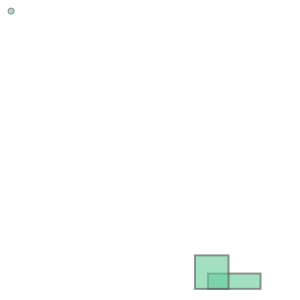

In [46]:
# display an individual chunk and its overlapping tiles
chunk_index = 19
GeometryCollection([origin]+[chunks_shapely[chunk_index]]+ [mosaic_shifted[i] for i in chunk_tiles[chunk_index]] )

In [47]:
chunk_slices_np = list(chunk_slices_numpy(target_array))

In [48]:
target_array[0:5000,0:5000]

dask.array<getitem, shape=(5000, 5000), dtype=uint16, chunksize=(4000, 4000), chunktype=numpy.ndarray>

In [50]:
target_array[chunk_slices_np[15]]

dask.array<getitem, shape=(4000, 3210), dtype=uint16, chunksize=(4000, 3210), chunktype=numpy.ndarray>

### Todo

For each chunk we need:

* tiles that map into the chunk, either numpy array, or link to image file
* affines corresponding to those tiles
* coordinates (slice) of the chunk into the larger array


Todo:
* for each chunk, find the `min_x`,`min_y` of the slice in the dask array.
* for each chunk get the `overlapping_tiles` and their corresponding transforms `overlapping_tiles_affines`
* create a transform that translates `min_x`, `min_y` to `0,0`.
* combine this transform with the original transforms (we will probably have to use the inverse somewhere)





In [55]:
example_dict ={}

In [56]:
example_dict[(4000,4000)] = [1,4,6]

In [57]:
example_dict

{(4000, 4000): [1, 4, 6]}

In [93]:
import pickle

In [95]:
pickle.dump?

In [96]:
with open("chunk_tiles_dict.pickle","wb") as f:
    pickle.dump(chunk_tiles, f)

In [97]:
!ls

backup.ipynb		 README.md    Stiching_Example_Dataset
chunk_tiles_dict.pickle  _sample.zip  utils
Load_Mosaic.ipynb	 scratch.py


In [98]:
stitched_shape


array([16937, 15210])